In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('News.csv', index_col = 0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
data.shape

(44919, 5)

In [8]:
data.isnull().sum()

,0
title,0
text,0
subject,21
date,21
class,0


In [9]:
data[data.duplicated()]

,title,text,subject,date,class
9943,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0
11447,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0
14928,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",0
17852,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN,0
17853,oros-backed Center for American Progress,and is heavily funded by Democracy Alliance,of which Soros is a major financier.Mercy Cor...,Mercy Corps places all blame for Palestinian ...,0
...,...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",1
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",1
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",1
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1


In [10]:
data.dropna(axis=0,inplace = True)
data.drop_duplicates(inplace = True)

In [11]:
data.to_csv('news-cleaned.csv', index = False)

In [12]:
data_cleaned = pd.read_csv('news-cleaned.csv')
data_cleaned.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
title_counter = Counter()
text_counter = Counter()

for index, row in data_cleaned.iterrows():
  title_words = word_tokenize(row['title'])
  text_words = word_tokenize(row['text'])

  title_words = [word.lower() for word in title_words if word.isalpha() and word.lower() not in stopwords.words('english')]
  text_words = [word.lower() for word in text_words if word.isalpha() and word.lower() not in stopwords.words('english')]

  if row['class'] == 0:
    title_counter.update(title_words)
    text_counter.update(text_words)


In [15]:
top_title_words = title_counter.most_common(10)
top_text_words = text_counter.most_common(10)

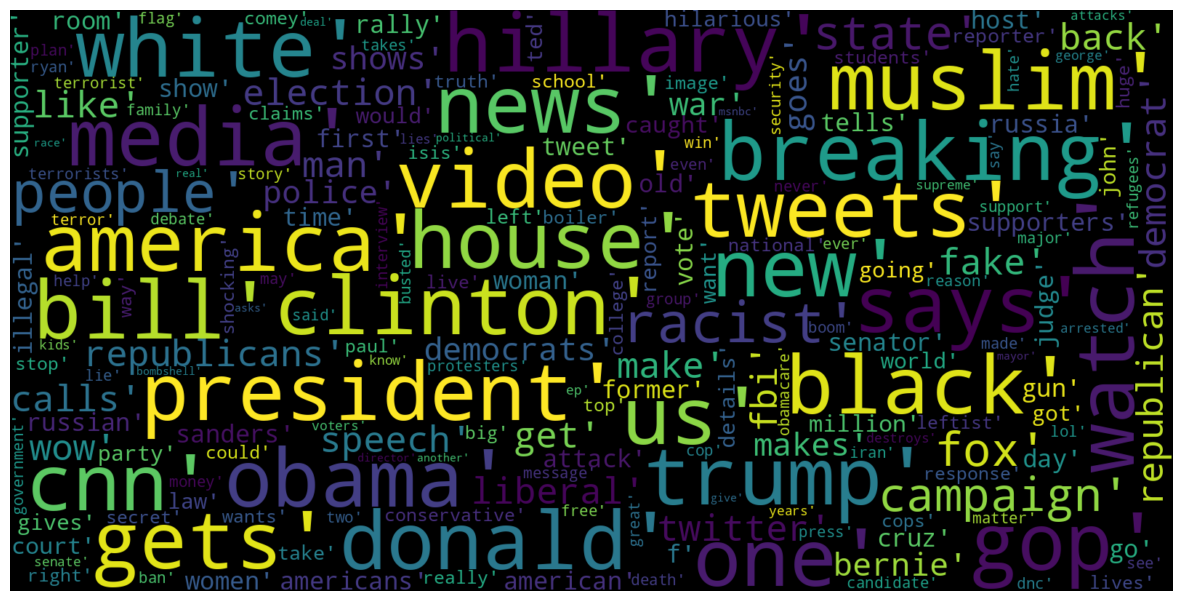

In [19]:
from wordcloud import WordCloud

wordCloud = WordCloud(width = 1600, height = 800, max_font_size = 110, collocations = False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(str(title_counter.most_common())), interpolation = 'bilinear')
plt.axis('off')
plt.show()

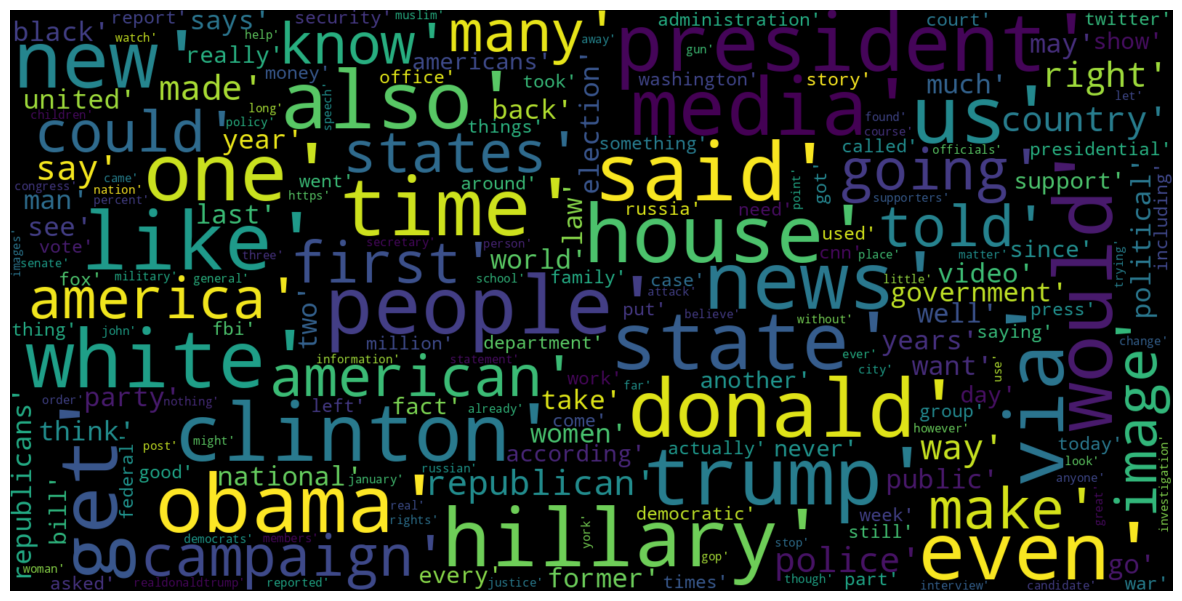

In [24]:
from wordcloud import WordCloud
wordCloud = WordCloud(width = 1600, height = 800, max_font_size = 110, collocations = False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(str(text_counter.most_common())), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [25]:
data['title_lenght'] = data_cleaned['title'].apply(len)
data['text_lenght'] = data_cleaned['text'].apply(len)

<BarContainer object of 2 artists>

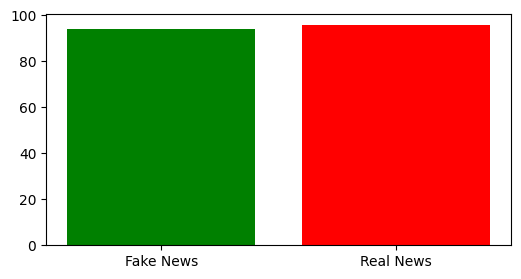

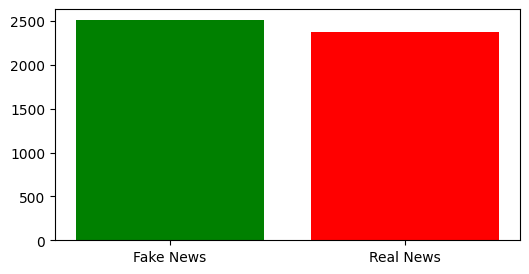

In [57]:
fake_news = data[data['class'] == 0]
real_news = data[data['class'] == 1]


average_title_length_fake = fake_news['title_lenght'].mean()
average_text_length_fake = fake_news['text_lenght'].mean()
average_title_length_real = real_news['title_lenght'].mean()
average_text_length_real = real_news['text_lenght'].mean()


plt.figure(figsize=(6, 3))
plt.bar(['Fake News', 'Real News'], [average_title_length_fake, average_title_length_real], label = 'Title Length', color = ['green', 'red'])
plt.figure(figsize=(6, 3))
plt.bar(['Fake News', 'Real News'], [average_text_length_fake, average_text_length_real], label = 'Text Length', color = ['green', 'red'])

In [39]:
from scipy.stats import chi2_contingency
import re

def text_classifier(text):
  sensetional_key_words = ['extra', 'unreal', 'shocking', 'unbelivable', 'mind-blowing', 'outrageous', 'evil', 'horrible']
  for key in sensetional_key_words:
    if re.search(r'\b' + key + r'\b', text, re.IGNORECASE):
      return 1
  return 0


In [40]:
data_cleaned['sensionalized'] = data_cleaned['text'].apply(text_classifier)

In [58]:
ctg_table = pd.crosstab(data_cleaned['sensionalized'], data_cleaned['class'])
chi2, p, dof, expected = chi2_contingency(ctg_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


alpha = 0.05
if p < alpha:
  print("There is a significant association between sensationalism of key words and credibility of the news.")
else:
  print("There is no significant association between sensationalism of key words and credibility of the news.")

Chi-squared statistic: 967.2391669061271
P-value: 2.373607145625163e-212
There is a significant association between sensationalism of key words and credibility of the news.


In [44]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [45]:
analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
  sentiment_scores = analyzer.polarity_scores(text)
  compound_score = sentiment_scores['compound']
  if compound_score >= 0.05:
    return 'Positive'
  elif compound_score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

data_cleaned['sentiment'] = data_cleaned['text'].apply(analyze_sentiment)


<BarContainer object of 3 artists>

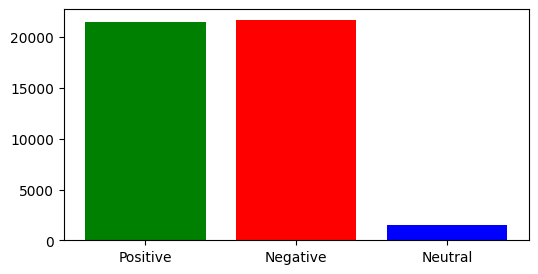

In [56]:
value_count = data_cleaned['sentiment'].value_counts()
count_positive = value_count['Positive']
count_negative = value_count['Negative']
count_neutral = value_count['Neutral']


plt.figure(figsize=(6, 3))
plt.bar(['Positive', 'Negative', 'Neutral'], [count_positive, count_negative, count_neutral], label = 'Sentiment', color = ['green', 'red', 'blue'])

In [48]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])

def preprocess(text):
    doc = nlp(text)

    final_key = []
    for token in doc:
        if token.is_stop == False and token.lemma_.isalpha():
            final_key.append(token.lemma_)
    return final_key

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
  ('vectorizer', CountVectorizer()),
  ('classifier', MultinomialNB())
])
params = {
    'vectorizer__ngram_range':[(1,1), (1,2), (1,3)],
    'vectorizer__tokenizer': [None, preprocess],
    'classifier__alpha': [0.1, 1.0],
}

gridCV = GridSearchCV(pipeline, param_grid = params, cv = 5, n_jobs = -1)
gridCV.fit(data_cleaned['text'], data_cleaned['class'])



/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", li

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.1, 1.0],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'vectorizer__tokenizer': [None,
                                                   <function preprocess at 0x7bd28c3f84a0>]})

In [50]:
print(gridCV.best_params_)

{'classifier__alpha': 0.1, 'vectorizer__ngram_range': (1, 3), 'vectorizer__tokenizer': None}


In [51]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


pipeline = Pipeline([
  ('vectorizer', CountVectorizer(ngram_range = gridCV.best_params_['vectorizer__ngram_range'], tokenizer = gridCV.best_params_['vectorizer__tokenizer'])),
  ('classifier', MultinomialNB(alpha = gridCV.best_params_['classifier__alpha']))
])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(kfold.split(data_cleaned), 1):
    train_data = data_cleaned.iloc[train_index]
    test_data = data_cleaned.iloc[test_index]

    X_train, y_train = train_data['text'], train_data['class']
    X_test, y_test = test_data['text'], test_data['class']

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    score_f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(accuracy)
    f1_scores.append(score_f1)

    print(f"Fold {fold} - Accuracy: {accuracy}, F1 Score: {score_f1}")



print(f"Accuracy average {np.mean(accuracy_scores)}, F1 Score's average: {np.mean(f1_scores)}")


Fold 1 - Accuracy: 0.982094897045658, F1 Score: 0.9820951147373168
Fold 2 - Accuracy: 0.982094897045658, F1 Score: 0.9820958950834088
Fold 3 - Accuracy: 0.9810877350044763, F1 Score: 0.9810890695408705
Fold 4 - Accuracy: 0.9835496866606983, F1 Score: 0.9835511492002955
Fold 5 - Accuracy: 0.9806379406827085, F1 Score: 0.980643529580374
Accuracy average 0.9818930312878399, F1 Score's average: 0.9818949516284532
